In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, cumtrapz

%matplotlib widget
 
plt.rcParams.update({'figure.dpi': 150})

# Werkcollege 1, opdracht 2

In dit notebook kan je zelf aan de slag met de numerieke berekeningen van de boot
uit werkcollege 1. Je kunt hier zelf het tijdstip waarop de kapitein begint met
remmen bepalen en ook andere parameters zoals de afstand tot de baai en de versnelling
van de boot aanpassen.

Door dit te variëren, hopen we dat je wat meer gevoel krijgt voor het type
beweging dat we in deze opgave bestuderen. Daarnaast kun je hiermee je antwoord
op de werkcollege-opgave controleren.

## Hoe gebruik ik dit notebook?

Voer eerst alle code-cellen uit. De laatste code-cell van het notebook maakt
een interactieve grafiek aan. Bovenaan deze grafiek staan drie sliders waarmee
je de maximale versnelling `a1`, het tijdstip van remmen `t1` en de afstand tot
de baai `s_q` aan kunt passen.

Je kunt ook direct waarden voor deze parameters intypen. Hiervoor klik je op de
getallen rechts van de sliders, typ je de gewenste waarde in en druk je op enter.
Let wel op dat dit alleen werkt voor waarden die binnen de grenzen van de sliders
liggen.

## Aanpassingen aan de code

De berekeningen zijn gelijk gebleven. Om het aanpassen van de variabelen
makkelijker te maken hebben we nu de grafieken als een IPython Widget weergegeven.
Zo heb je sliders om de verschillende variabelen aan te passen. 

Om dit te laten werken hebben we enkele extra functies geschreven in de code-cell
hieronder. Als je de grenzen van de grafieken aan wilt passen kan je dat in 
de functie `setup_plots` doen.

De functie `update` in de onderste code-cell zorgt ervoor dat de grafiek opnieuw
getekend wordt wanneer de sliders bewegen. Op regels 27-30 wordt de grafiek met
de sliders aangemaakt. Wanneer je de grenzen van de sliders aan wilt passen, kan
je dat daar doen.

In [67]:
@np.vectorize
def a(t, t1=10, a1=10):
    ''' Versnelling van de boot
    input:
        - t  (float): het tijdstip in seconden
        - t1 (float): het tijdstip waarop de kapitein begint met afremmen in s
        - a1 (float): maximale versnelling van de boot in m/s²
    output:
        - de versnelling op tijstip t in m/s²
    '''
    if t < t1:
        return (a1 / t1) * t
    else:
        return -a1 / 2
        
def eom(t, state, t1=10, a1=10):
    ''' De bewegingsvergelijkingen van de boot
    input:
        - t (float): het huidige tijdstip
        - state (tuple): de positie en de versnelling in meter en m/s
        - t1 (float): het tijdstip waarop de kapitein begint met afremmen in s
        - a1 (float): maximale versnelling van de boot in m/s²
    output:
        - ds (float): de afgeleide van de positie naar de tijd in meter per seconde
        - dv (float): de afgeleide van de versnelling naar de tijd in m/s²
    '''
    s, v = state
    ds = v
    dv = a(t, t1, a1)
    return ds, dv

def get_results(a1, t1, t_span, s_q):
    ''' Bepaal de beweging van de boot uit de parameters van de beweging
    input:
        - a1 (float): maximale versnelling van de boot in m/s²
        - t1 (float): het tijdstip waarop de kapitein begint met afremmen in s
        - t_span (array): de tijdstippen waarop de beweging wordt uitgevoerd
        - s_q (float): de afstand tot de baai in m
    output:
        - sol (tuple): de berekende beweging (s, v)
    '''
    sol = solve_ivp(eom, (0, t_span[-1]), (-s_q, 0), t_eval=t_span, args=(t1, a1))
    return sol

def find_zero(y):
    ''' Vind waar de lijst y door nul gaat '''
    return np.where(y[:-1] * y[1:] < 0)[0]

def add_zero_lines(ax):
    ''' Teken een verticale lijn in het assenstelsel waar de lijn de x-as snijdt '''
    line = ax.lines[-1]
    n = 0
    for z in find_zero(line.get_ydata()):
        n += 1
        ax.axvline(line.get_xdata()[z], color='grey', lw=1, ls='--')
    return n

def setup_plots(ax):
    ''' Maak de grafieken aan in het assenstelsel ax '''

    ax[1].axhline(0, color='grey', lw=1, ls='--')
    ax[2].axhline(0, color='grey', lw=1, ls='--')

    sol = get_results(a1=5, t1=5, t_span=np.linspace(0, 50, 1000), s_q=50)
    line1, = ax[0].plot(sol.t, a(sol.t, t1=5, a1=5))
    line2, = ax[1].plot(sol.t, sol.y[1])
    line3, = ax[2].plot(sol.t, sol.y[0])

    ax[0].set_ylabel(r'$a_{s,A}$ (m/s$^2$)')
    ax[0].set_ylim(-20, 20)
    ax[2].set_ylim(-1000, 1000)
    ax[1].set_ylim(-100, 100)
    ax[1].set_ylabel(r'$v_{s,A}$ (m/s)')
    ax[2].set_ylabel(r'$s_A$ (m)')
    ax[-1].set_xlabel(r'$t$ (s)')

    nlines2 = add_zero_lines(ax[2])
    nlines1 = add_zero_lines(ax[1])

    return line1, line2, line3, nlines1, nlines2

interactive(children=(FloatSlider(value=10.0, description='a1', max=15.0, min=-15.0, step=0.5), FloatSlider(va…

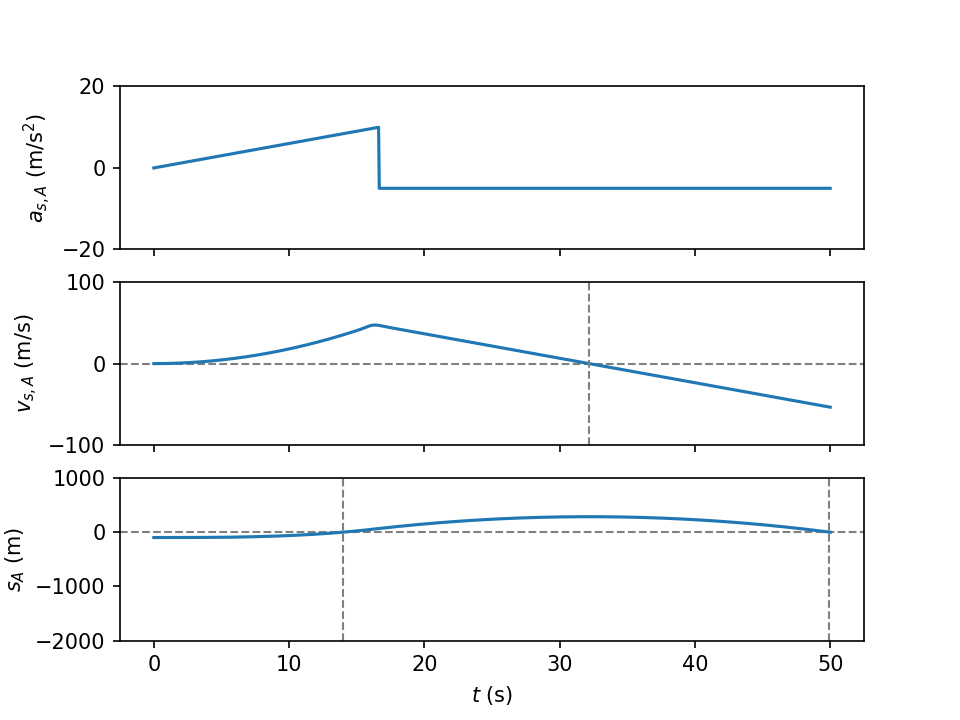

In [68]:
from ipywidgets import interact

fig, ax = plt.subplots(3, 1, sharex=True)

line1, line2, line3, nlines1, nlines2 = setup_plots(ax)

def update(a1=10, t1=10, s_q=100):
    global nlines2, nlines1
    if nlines2 > 0:
        for i in range(nlines2):
            ax[2].lines[-1].remove()
    if nlines1 > 0:
        for i in range(nlines1):
            ax[1].lines[-1].remove()
    t2 = 30
    nt = 1000
    sol = get_results(a1=a1, t1=t1, t_span = np.linspace(0, t2, nt), s_q=s_q)
    line1.set_ydata(a(sol.t, t1=t1, a1=a1))
    line2.set_ydata(sol.y[1])
    line3.set_ydata(sol.y[0])

    nlines1 = add_zero_lines(ax[1])
    nlines2 = add_zero_lines(ax[2])

    fig.canvas.draw_idle()

interactive_plot = interact(update, 
                            a1=(-15, 15, 0.5),
                            t1=(0, 10, 0.1),
                            s_q=(0, 200))

plt.show()